In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('train.csv')

df_test=pd.read_csv('test.csv')

output=pd.DataFrame({'PassengerId':df_test.PassengerId})

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.drop(['Cabin','Age','Ticket','Name'],inplace=True,axis=1)
df_test.drop(['Cabin','Age','Ticket','Name'],inplace=True,axis=1)

In [6]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S
887,888,1,1,female,0,0,30.0000,S
888,889,0,3,female,1,2,23.4500,S
889,890,1,1,male,0,0,30.0000,C


In [7]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
61,62,1,1,female,0,0,80.0,NaN
829,830,1,1,female,0,0,80.0,NaN


In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(889, 8)

In [11]:
df

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S
887,888,1,1,female,0,0,30.0000,S
888,889,0,3,female,1,2,23.4500,S
889,890,1,1,male,0,0,30.0000,C


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


In [13]:
df_Sex=pd.get_dummies(df['Sex'],drop_first=True,prefix='Sex')

In [14]:
df=pd.concat([df,df_Sex],axis=1)

In [15]:
df_embarked=pd.get_dummies(df['Embarked'],drop_first=True,prefix='Embarked')

In [16]:


df=pd.concat([df,df_embarked],axis=1)



In [17]:
df_test_Sex=pd.get_dummies(df_test['Sex'],drop_first=True,prefix='Sex')
df_test=pd.concat([df_test,df_test_Sex],axis=1)
df_test_embarked=pd.get_dummies(df_test['Embarked'],drop_first=True,prefix='Embarked')
df_test=pd.concat([df_test,df_test_embarked],axis=1)

In [18]:
df.drop(['Sex','Embarked','PassengerId','Embarked_Q','SibSp','Fare'],axis=1,inplace=True)

In [19]:
df_test.drop(['Sex','Embarked','PassengerId','Embarked_Q','SibSp','Fare'],axis=1,inplace=True)

In [20]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [21]:
y=df['Survived']
X=df.drop('Survived',axis=1)
df_test

,Pclass,Parch,Sex_male,Embarked_S
0,3,0,1,0
1,3,0,0,1
2,2,0,1,0
3,3,0,1,1
4,3,1,0,1
...,...,...,...,...
413,3,0,1,1
414,1,0,0,0
415,3,0,1,1
416,3,0,1,1


In [22]:
from sklearn.preprocessing import StandardScaler
sclr=StandardScaler()
X=pd.DataFrame(sclr.fit_transform(X),columns=X.columns,index=X.index)
df_test=pd.DataFrame(sclr.transform(df_test),columns=df_test.columns,index=df_test.index)


In [23]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((666, 4), (223, 4), (666,), (223,))

In [26]:
y_test.head()

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

In [27]:
lr=LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
lr.score(X_train,y_train)

0.7867867867867868

In [29]:
lr.score(X_test,y_test)

0.7668161434977578

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [31]:
sc1=SVC(kernel='linear')
sc1.fit(X_train,y_train)
sc1.score(X_train,y_train),sc1.score(X_test,y_test)

(0.7852852852852853, 0.7892376681614349)

In [32]:
sc2=SVC(kernel='rbf')
sc2.fit(X_train,y_train)
print(sc2.score(X_train,y_train),sc2.score(X_test,y_test))


0.8153153153153153 0.8161434977578476


In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=3,n_estimators=128,min_samples_leaf=3,min_samples_split=9)
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train),rfc.score(X_test,y_test)

(0.8108108108108109, 0.8161434977578476)

In [34]:
#sc3=SVC(kernel='poly',degree=3,gamma='auto')
model=SVC(kernel='poly',degree=4,gamma='scale',C=1.0)
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(0.8153153153153153, 0.8161434977578476)

In [35]:
from sklearn.inspection import permutation_importance

Text(0.5, 0, 'Permutation Importance')

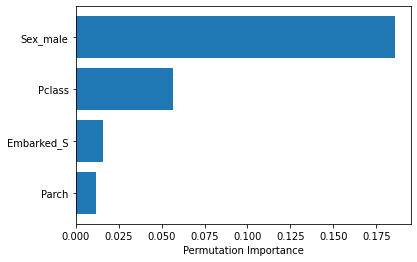

In [36]:
perm_importance = permutation_importance(model, X_test, y_test)

feature_names = X.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [41]:
predictions=model.predict(df_test)
output['Survived']=predictions
output.to_csv('my_submittion.csv',index=False)
print('Submittion saved!!!')


Submittion saved!!!


0    305
1    113
Name: Survived, dtype: int64